**MEMBACA DATASET**

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("dataset.csv", sep=",")
data.head()

,Kategori,Pesan
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(
2,ham,Kalau mau bikin model/controller mending per a...
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...


In [ ]:
percentage_counts = data['Kategori'].value_counts(normalize=True) * 100

print("Persentase jumlah 'ham' dan 'spam':")
print(percentage_counts)

Persentase jumlah 'ham' dan 'spam':
Kategori
spam    50.218723
ham     49.781277
Name: proportion, dtype: float64


CEK MISSING VALUE

In [ ]:
data.isnull().sum()

Kategori    0
Pesan       0
dtype: int64

**PRE-PROCESSING DATA**

Memasukkan dataset ke dalam dataframe.

Memasukkan dataset ke dataframe.

**CLEANING**

In [ ]:
import re
import string
import nltk

def remove_url(spam):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', spam)

def remove_html(spam):
  html = re.compile(r'<.*?>')
  return html.sub(r'', spam)

def remove_emoji(spam):
  emoji = re.compile("["
  u"\U0001F600-\U0001F64F"
  u"\U0001F300-\U0001F5FF"
  u"\U0001F680-\U0001F6FF"
  u"\U0001F1E0-\U0001F1FF"
                        "]+", flags = re.UNICODE)
  return emoji.sub(r'', spam)

def remove_angka(spam):
  spam = re.sub('[0-9]+', '', spam)

  spam = re.sub(r'\$\w*', '', spam)

  spam = re.sub(r'^RT[\s]+', '', spam)

  spam = re.sub(r'#', '', spam)
  return spam

def remove_punct(spam):
  translator = str.maketrans('', '', string.punctuation)
  return spam.translate(translator)

data['cleaning'] = data['Pesan'].apply(lambda x: remove_url(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_html(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_emoji(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_punct(x))
data['cleaning'] = data['cleaning'].apply(lambda x: remove_angka(x))

def casefoldingText(data):
  data= data.lower()
  return data

data['CaseFolding'] = data['cleaning'].apply(casefoldingText)

data


,Kategori,Pesan,cleaning,CaseFolding
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,Plg Yth Simcard anda mendptkan bonus poin plus...,plg yth simcard anda mendptkan bonus poin plus...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,Iya ih ko sedih sih gtau kapan lg ke bandung,iya ih ko sedih sih gtau kapan lg ke bandung
2,ham,Kalau mau bikin model/controller mending per a...,Kalau mau bikin modelcontroller mending per apa y,kalau mau bikin modelcontroller mending per apa y
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,Selamat nama Semoga selalu menempuh hidup yang...,selamat nama semoga selalu menempuh hidup yang...
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...
...,...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,Yg ragu sm buletdatar atau yg pgn ikutan debat...,yg ragu sm buletdatar atau yg pgn ikutan debat...
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",Semangat yang ibu gita ibu putri dan bapak adi...,semangat yang ibu gita ibu putri dan bapak adi...
1140,ham,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...,nama minta database kamu sama view dan control...
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,Dapatkan GRATIS cappuccino hotice Freza seti...,dapatkan gratis cappuccino hotice freza seti...


TOKENIZATION

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

def tokenizingText(data):
    data = word_tokenize(data)
    return data

data['tokenizing'] = data['CaseFolding'].apply(tokenizingText)

data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Kategori,Pesan,cleaning,CaseFolding,tokenizing
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,Plg Yth Simcard anda mendptkan bonus poin plus...,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po..."
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,Iya ih ko sedih sih gtau kapan lg ke bandung,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,..."
2,ham,Kalau mau bikin model/controller mending per a...,Kalau mau bikin modelcontroller mending per apa y,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ..."
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,Selamat nama Semoga selalu menempuh hidup yang...,selamat nama semoga selalu menempuh hidup yang...,"[selamat, nama, semoga, selalu, menempuh, hidu..."
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut..."
...,...,...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,Yg ragu sm buletdatar atau yg pgn ikutan debat...,yg ragu sm buletdatar atau yg pgn ikutan debat...,"[yg, ragu, sm, buletdatar, atau, yg, pgn, ikut..."
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",Semangat yang ibu gita ibu putri dan bapak adi...,semangat yang ibu gita ibu putri dan bapak adi...,"[semangat, yang, ibu, gita, ibu, putri, dan, b..."
1140,ham,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...,nama minta database kamu sama view dan control...,"[nama, minta, database, kamu, sama, view, dan,..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,Dapatkan GRATIS cappuccino hotice Freza seti...,dapatkan gratis cappuccino hotice freza seti...,"[dapatkan, gratis, cappuccino, hotice, freza, ..."


NORMALISASI

In [ ]:
def convertToSlangword(ulasan):
    kamusSlang = eval(open("slangwords.txt").read())
    pattern = re.compile(r'\b(' + '|'.join(kamusSlang.keys()) + r')\b')
    content = []
    for kata in ulasan:
        filterSlang = pattern.sub(lambda x: kamusSlang[x.group()], kata)
        content.append(filterSlang.lower())
    return content

data['normalisasi'] = data['tokenizing'].apply(convertToSlangword)

data

,Kategori,Pesan,cleaning,CaseFolding,tokenizing,normalisasi
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,Plg Yth Simcard anda mendptkan bonus poin plus...,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po...","[pelanggan, yang terhormat, kartu, anda, menda..."
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,Iya ih ko sedih sih gtau kapan lg ke bandung,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,...","[iya, ih, ko, sedih, sih, tidak tahu, kapan, l..."
2,ham,Kalau mau bikin model/controller mending per a...,Kalau mau bikin modelcontroller mending per apa y,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ...","[kalau, mau, bikin, modelcontroller, lebih bai..."
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,Selamat nama Semoga selalu menempuh hidup yang...,selamat nama semoga selalu menempuh hidup yang...,"[selamat, nama, semoga, selalu, menempuh, hidu...","[selamat, nama, semoga, selalu, menempuh, hidu..."
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, anda, selanjut..."
...,...,...,...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,Yg ragu sm buletdatar atau yg pgn ikutan debat...,yg ragu sm buletdatar atau yg pgn ikutan debat...,"[yg, ragu, sm, buletdatar, atau, yg, pgn, ikut...","[yang, ragu, sm, buletdatar, atau, yang, pgn, ..."
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",Semangat yang ibu gita ibu putri dan bapak adi...,semangat yang ibu gita ibu putri dan bapak adi...,"[semangat, yang, ibu, gita, ibu, putri, dan, b...","[semangat, yang, ibu, gita, ibu, putri, dan, b..."
1140,ham,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...,nama minta database kamu sama view dan control...,"[nama, minta, database, kamu, sama, view, dan,...","[nama, minta, database, kamu, sama, view, dan,..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,Dapatkan GRATIS cappuccino hotice Freza seti...,dapatkan gratis cappuccino hotice freza seti...,"[dapatkan, gratis, cappuccino, hotice, freza, ...","[dapatkan, gratis, cappuccino, hotice, freza, ..."


FILTERING ATAU STOPWORD REMOVAL

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
  return [word for word in text if word not in stop_words]

data['Filtering / Stopword Removal'] = data['normalisasi'].apply(lambda x: remove_stopwords(x))
data

,Kategori,Pesan,cleaning,CaseFolding,tokenizing,normalisasi,Filtering / Stopword Removal
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,Plg Yth Simcard anda mendptkan bonus poin plus...,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po...","[pelanggan, yang terhormat, kartu, anda, menda...","[pelanggan, yang terhormat, kartu, bonus, poin..."
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,Iya ih ko sedih sih gtau kapan lg ke bandung,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,...","[iya, ih, ko, sedih, sih, tidak tahu, kapan, l...","[iya, ih, ko, sedih, sih, tidak tahu, bandung]"
2,ham,Kalau mau bikin model/controller mending per a...,Kalau mau bikin modelcontroller mending per apa y,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ...","[kalau, mau, bikin, modelcontroller, lebih bai...","[bikin, modelcontroller, lebih baik, ya]"
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,Selamat nama Semoga selalu menempuh hidup yang...,selamat nama semoga selalu menempuh hidup yang...,"[selamat, nama, semoga, selalu, menempuh, hidu...","[selamat, nama, semoga, selalu, menempuh, hidu...","[selamat, nama, semoga, menempuh, hidup, bahag..."
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, minimal, rprib..."
...,...,...,...,...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,Yg ragu sm buletdatar atau yg pgn ikutan debat...,yg ragu sm buletdatar atau yg pgn ikutan debat...,"[yg, ragu, sm, buletdatar, atau, yg, pgn, ikut...","[yang, ragu, sm, buletdatar, atau, yang, pgn, ...","[ragu, sm, buletdatar, pgn, ikutan, debat, kus..."
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",Semangat yang ibu gita ibu putri dan bapak adi...,semangat yang ibu gita ibu putri dan bapak adi...,"[semangat, yang, ibu, gita, ibu, putri, dan, b...","[semangat, yang, ibu, gita, ibu, putri, dan, b...","[semangat, gita, putri, adison, esok, semoga, ..."
1140,ham,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...,nama minta database kamu sama view dan control...,"[nama, minta, database, kamu, sama, view, dan,...","[nama, minta, database, kamu, sama, view, dan,...","[nama, database, view, controller, js, dropdow..."
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,Dapatkan GRATIS cappuccino hotice Freza seti...,dapatkan gratis cappuccino hotice freza seti...,"[dapatkan, gratis, cappuccino, hotice, freza, ...","[dapatkan, gratis, cappuccino, hotice, freza, ...","[dapatkan, gratis, cappuccino, hotice, freza, ..."


STEMMING DATA

In [ ]:
!pip install Sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

data['stemming_data'] = data['Filtering / Stopword Removal'].apply(lambda x: ' '.join(stem_text(x)))
data


,Kategori,Pesan,cleaning,CaseFolding,tokenizing,normalisasi,Filtering / Stopword Removal,stemming_data
0,spam,Plg Yth: Simcard anda mendptkan bonus poin plu...,Plg Yth Simcard anda mendptkan bonus poin plus...,plg yth simcard anda mendptkan bonus poin plus...,"[plg, yth, simcard, anda, mendptkan, bonus, po...","[pelanggan, yang terhormat, kartu, anda, menda...","[pelanggan, yang terhormat, kartu, bonus, poin...",langgan yang hormat kartu bonus poin plusplus ...
1,ham,Iya ih ko sedih sih gtau kapan lg ke bandung :(,Iya ih ko sedih sih gtau kapan lg ke bandung,iya ih ko sedih sih gtau kapan lg ke bandung,"[iya, ih, ko, sedih, sih, gtau, kapan, lg, ke,...","[iya, ih, ko, sedih, sih, tidak tahu, kapan, l...","[iya, ih, ko, sedih, sih, tidak tahu, bandung]",iya ih ko sedih sih tidak tahu bandung
2,ham,Kalau mau bikin model/controller mending per a...,Kalau mau bikin modelcontroller mending per apa y,kalau mau bikin modelcontroller mending per apa y,"[kalau, mau, bikin, modelcontroller, mending, ...","[kalau, mau, bikin, modelcontroller, lebih bai...","[bikin, modelcontroller, lebih baik, ya]",bikin modelcontroller lebih baik ya
3,ham,Selamat nama1. Semoga selalu menempuh hidup ya...,Selamat nama Semoga selalu menempuh hidup yang...,selamat nama semoga selalu menempuh hidup yang...,"[selamat, nama, semoga, selalu, menempuh, hidu...","[selamat, nama, semoga, selalu, menempuh, hidu...","[selamat, nama, semoga, menempuh, hidup, bahag...",selamat nama moga tempuh hidup bahagia senang
4,spam,Tingkatkan nilai isi ulang Anda selanjutnya mi...,Tingkatkan nilai isi ulang Anda selanjutnya mi...,tingkatkan nilai isi ulang anda selanjutnya mi...,"[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, anda, selanjut...","[tingkatkan, nilai, isi, ulang, minimal, rprib...",tingkat nilai isi ulang minimal rpribu paket m...
...,...,...,...,...,...,...,...,...
1138,ham,Yg ragu sm bulet/datar atau yg pgn ikutan deba...,Yg ragu sm buletdatar atau yg pgn ikutan debat...,yg ragu sm buletdatar atau yg pgn ikutan debat...,"[yg, ragu, sm, buletdatar, atau, yg, pgn, ikut...","[yang, ragu, sm, buletdatar, atau, yang, pgn, ...","[ragu, sm, buletdatar, pgn, ikutan, debat, kus...",ragu sm buletdatar pgn ikut debat kusir v
1139,ham,"Semangat yang ibu gita, ibu putri dan bapak ad...",Semangat yang ibu gita ibu putri dan bapak adi...,semangat yang ibu gita ibu putri dan bapak adi...,"[semangat, yang, ibu, gita, ibu, putri, dan, b...","[semangat, yang, ibu, gita, ibu, putri, dan, b...","[semangat, gita, putri, adison, esok, semoga, ...",semangat gita putri adison esok moga baik aamiin
1140,ham,"nama1, minta database kamu sama view dan contr...",nama minta database kamu sama view dan control...,nama minta database kamu sama view dan control...,"[nama, minta, database, kamu, sama, view, dan,...","[nama, minta, database, kamu, sama, view, dan,...","[nama, database, view, controller, js, dropdow...",nama database view controller js dropdown kota
1141,spam,Dapatkan GRATIS 1 cappuccino (hot/ice) & Freza...,Dapatkan GRATIS cappuccino hotice Freza seti...,dapatkan gratis cappuccino hotice freza seti...,"[dapatkan, gratis, cappuccino, hotice, freza, ...","[dapatkan, gratis, cappuccino, hotice, freza, ...","[dapatkan, gratis, cappuccino, hotice, freza, ...",dapat gratis cappuccino hotice freza transaksi...


**SAVE DATASET HASIL PRE-PROCESSING DATA**

In [ ]:
data.to_csv('Hasil_PreProcessing_Dataset.csv', encoding = 'utf8', index = False)

:**TF-IDF DAN RASIO DATASET 80:20 TRAINING (LATIH) DAN TESTING (UJI)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=3, max_df=0.5, ngram_range=(1, 1))
features = tfidf.fit_transform(data['Pesan'].values)
dfuni = pd.DataFrame(features.todense(), columns=tfidf.get_feature_names_out())


In [ ]:
print(dfuni.shape)

(1143, 1210)


In [ ]:
dfuni.head()

,00,000,001,01,0100,02,021,02599875,06,07,...,yank,yaris,yaudah,yg,yogya,your,yth,yuk,z10,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.197883,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.156313,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


SPLIT DATA

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree, metrics
from sklearn.metrics import classification_report

In [ ]:
dfuni['y'] = data['Kategori']
X_train, X_test, y_train, y_test = train_test_split(dfuni.drop(['y'], axis=1), dfuni[['y']], test_size=0.20, random_state=555)

In [ ]:
dfunitrain = X_train.join(y_train)
dfunitest = X_test.join(y_test)

X_unitrain = dfunitrain.drop(['y'], axis=1)
y_unitrain = dfunitrain['y']
X_unitest = dfunitest.drop(['y'], axis=1)
y_unitest = dfunitest['y']

In [ ]:
X_train

,00,000,001,01,0100,02,021,02599875,06,07,...,yank,yaris,yaudah,yg,yogya,your,yth,yuk,z10,zona
729,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
530,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
145,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
485,0.212345,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
184,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1057,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.284067,0.0,0.0,0.0,0.0,0.0
1001,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
686,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


**SVM**

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics

In [ ]:
# Membuat parameter grid untuk hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear',  'rbf', 'sigmoid'],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# Inisialiasai klasifikasi menggunakan SVM
clf = svm.SVC(max_iter=-1)


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Inisialisasi GridSearchCV dengan SVM dan parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy')

# Memuat GridSearchCV ke data training
grid_search.fit(X_unitrain, y_unitrain.values.ravel())

# Mendapatkan parameter dan skor akurasi terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Parameter terbaik: {best_params}')
print(f'Skor cross-validated terbaik : {best_score:.3f}')

# Training SVM menggunakan parameter terbaik tadi
best_clf = grid_search.best_estimator_
best_clf.fit(X_unitrain, y_unitrain.values.ravel())

# Prediksi pada data uji atau test
y_unipred = best_clf.predict(X_unitest)
y_train_pred = best_clf.predict(X_unitrain)

# Akurasi Training
train_accuracy = best_clf.score(X_unitrain, y_unitrain)
print("Training Accuracy of SVM:", train_accuracy)
# Evaluasi SVM pada data uji
test_accuracy = best_clf.score(X_unitest, y_unitest)
print("Skor Akurasi Testing SVM:", test_accuracy)
print(metrics.classification_report(y_unitest, y_unipred, digits=3))

Parameter terbaik: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Skor cross-validated terbaik : 0.977
Training Accuracy of SVM: 1.0
Skor Akurasi Testing SVM: 0.9606986899563319
              precision    recall  f1-score   support

         ham      0.947     0.973     0.960       111
        spam      0.974     0.949     0.961       118

    accuracy                          0.961       229
   macro avg      0.961     0.961     0.961       229
weighted avg      0.961     0.961     0.961       229



WORDCLOUD

In [ ]:
data = pd.read_csv('Hasil_PreProcessing_Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Kategori                      1143 non-null   object
 1   Pesan                         1143 non-null   object
 2   cleaning                      1143 non-null   object
 3   CaseFolding                   1143 non-null   object
 4   tokenizing                    1143 non-null   object
 5   normalisasi                   1143 non-null   object
 6   Filtering / Stopword Removal  1143 non-null   object
 7   stemming_data                 1143 non-null   object
dtypes: object(8)
memory usage: 71.6+ KB


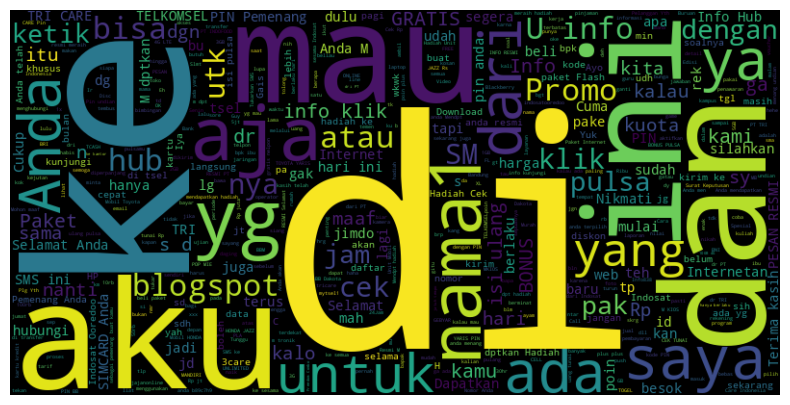

In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df = ' '.join(data['Pesan'].tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp'])

wc = WordCloud(stopwords=stopwords, background_color="black", max_words=500, width = 800, height =400)
wc.generate(df)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation ='bilinear')
plt.axis("off")
plt.show()

FREKUENSI KATA

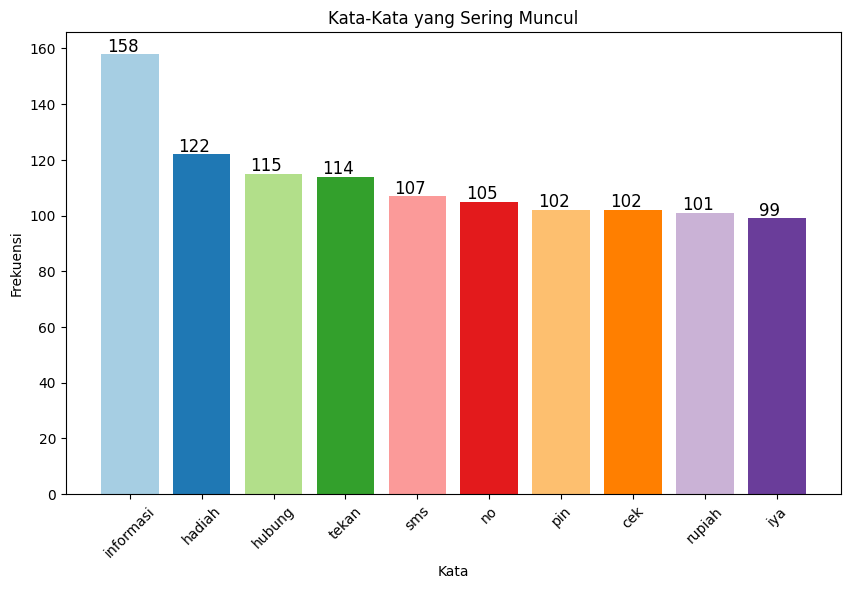

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

text = " ".join(data['stemming_data'])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

#definisikan warna
colors = plt.cm.Paired(range(len(word)))

plt.figure(figsize= (10, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("Kata-Kata yang Sering Muncul")
plt.xticks(rotation = 45)

#menambahkan angka rata tengah di atas setiap bar
for bar, num in zip(bars, count):
  plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize = 12, color='black', ha='center')

plt.show()

**DOWNLOAD MODEL LEWAT PKL**

In [ ]:
import pickle

with open('vec.pkl', 'wb') as file:
  pickle.dump(tfidf, file)
with open('clf.pkl', 'wb') as file:
  pickle.dump(clf, file)

**TESTING MODEL PKL**

In [ ]:
import pickle
from sklearn.model_selection import cross_val_score

# Load the saved model
with open('clf.pkl', 'rb') as file:
    clf = pickle.load(file)

# Perform cross-validation on the training data
cv_scores = cross_val_score(clf, X_unitrain, y_unitrain.values.ravel(), cv=kf, scoring='accuracy')

# Output mean and standard deviation of cross-validated scores
print(f'Cross-validated scores: {cv_scores}')
print(f'Mean cross-validated score: {cv_scores.mean():.3f}')
print(f'Standard deviation of cross-validated scores: {cv_scores.std():.3f}')

print("SVM Test Accuracy Score:", clf.score(X_unitest, y_unitest))
print(metrics.classification_report(y_unitest, y_unipred, digits=3))

Cross-validated scores: [0.97814208 0.95628415 0.96721311 0.96174863 0.98901099]
Mean cross-validated score: 0.970
Standard deviation of cross-validated scores: 0.012
SVM Test Accuracy Score: 0.9737991266375546
              precision    recall  f1-score   support

         ham      0.947     0.973     0.960       111
        spam      0.974     0.949     0.961       118

    accuracy                          0.961       229
   macro avg      0.961     0.961     0.961       229
weighted avg      0.961     0.961     0.961       229

